# Simple Bagging Example

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [14]:
sample = np.random.randint(low=1, high=100, size=10)
sample.mean()

49.2

In [15]:
resample=[np.random.choice(sample, size=sample.shape) for i in range(100)]
len(resample)

100

In [16]:
resample_means = np.array([resample.mean() for resample in resample])
resample_means.mean()

49.826

In [17]:
X, y = make_classification(
    n_samples=1000, n_features=100, n_informative=20,
    n_clusters_per_class=2,
    random_state=11)
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=11)

In [18]:
clf=DecisionTreeClassifier(random_state=11)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.73      0.66      0.69       127
          1       0.68      0.75      0.71       123

avg / total       0.71      0.70      0.70       250



# Simple Boosting Example

In [19]:
X, y = make_classification(
    n_samples=1000, n_features=50, n_informative=30,
    n_clusters_per_class=3,
    random_state=11)
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=11)

In [20]:
clf=DecisionTreeClassifier(random_state=11)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.688


In [21]:
clf=AdaBoostClassifier(n_estimators=50, random_state=11)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.768


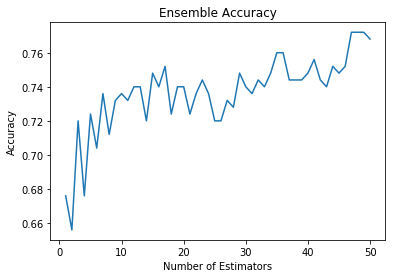

In [22]:
plt.title('Ensemble Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Estimators')
plt.plot(range(1, 51),[accuracy for accuracy in clf.staged_score(X_test, y_test)])